In [3]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [5]:
df_train = pd.read_csv("/home/achintya/Desktop/CODES/ML Simplilearn/Demo Datasets/Lesson 4/train.csv")


In [15]:
df_train.shape

(891, 12)

In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

age seems relevent but not the cabin as it has many null values
passenger's name, ticket and passenger id seems irrelevent 

In [25]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [31]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24 
    else:
        return Age 

In [32]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [34]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis=1)

In [35]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [36]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [38]:
df_train_dummied = pd.get_dummies(df_train, columns=['Sex'])

In [39]:
df_train_dummied = pd.get_dummies(df_train_dummied, columns=["Embarked"])

In [40]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [41]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

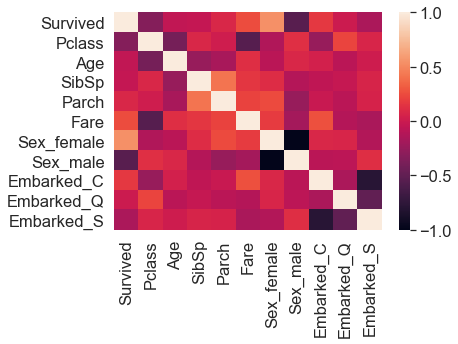

In [43]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_train_dummied.corr())

In [44]:
used_features = ["Pclass", "Age", "SibSp", "Parch", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]

In [46]:
x = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [49]:
print(X_train.shape)
print(X_test.shape)

(622, 9)
(267, 9)


In [50]:
logreg = LogisticRegression()

In [52]:
logreg.fit(X_train, Y_train)

LogisticRegression()

In [53]:
y_pred = logreg.predict(X_test)

In [54]:
metrics.confusion_matrix(Y_test, y_pred)

array([[138,  29],
       [ 25,  75]])

In [56]:
Y_test.value_counts()

0    167
1    100
Name: Survived, dtype: int64

In [58]:
metrics.accuracy_score(Y_test, y_pred)

0.797752808988764

In [59]:
len(X_test)

267

In [60]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [61]:
logreg.coef_

array([[-1.19432294, -0.04964554, -0.40747426, -0.01162756,  1.33986673,
        -1.33500213,  0.3376917 , -0.08613119, -0.24669591]])

In [62]:
logreg.intercept_

array([4.34536751])

In [63]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [64]:
logreg.predict_proba(X_test)

array([[0.90108819, 0.09891181],
       [0.04235266, 0.95764734],
       [0.20793049, 0.79206951],
       [0.75293783, 0.24706217],
       [0.03464507, 0.96535493],
       [0.89657442, 0.10342558],
       [0.70393665, 0.29606335],
       [0.8655131 , 0.1344869 ],
       [0.07774948, 0.92225052],
       [0.03424939, 0.96575061],
       [0.60331695, 0.39668305],
       [0.43619913, 0.56380087],
       [0.96614483, 0.03385517],
       [0.87359988, 0.12640012],
       [0.90542575, 0.09457425],
       [0.90108819, 0.09891181],
       [0.67612431, 0.32387569],
       [0.80634051, 0.19365949],
       [0.73080338, 0.26919662],
       [0.88192555, 0.11807445],
       [0.73093775, 0.26906225],
       [0.08350097, 0.91649903],
       [0.94863366, 0.05136634],
       [0.42144383, 0.57855617],
       [0.88192555, 0.11807445],
       [0.45812023, 0.54187977],
       [0.69589553, 0.30410447],
       [0.14545076, 0.85454924],
       [0.56648851, 0.43351149],
       [0.71417749, 0.28582251],
       [0.